<center>
<hr>
<hr>
<font style="font-size:5.4em ; color:black'" > 
<span style="background : yellow">
#7 Ordinary Differential Equation
</span>
</font>
<hr>
<hr>
</center>


In [255]:

%matplotlib inline
from IPython.display import display,Latex,Math,HTML
import sympy as sym
import math
import numpy as np
import scipy as sp
import math
import matplotlib.pyplot as plt
import matplotlib.animation as animation

<center>
<hr>
<font size="20" color='Blue' >Euler's Method</font>
<hr>
</center>

In [256]:
Latex(""" \\begin{equation*} \\huge
      y_{i+1} = y_i + f(x_i,y_i) \\cdot h
      \\end{equation*} 
      """)

<IPython.core.display.Latex object>


## Example 25.1 Euler's Method

### Program Statement

* Use Euler’s method to numerically integrate Eq. (PT7.13):

In [257]:
Latex(""" \\begin{equation*} \\huge
      {dy \over dx} = -2 x^3 + 12 x^2 - 20 x + 8.5
      \\end{equation*} 
      """)

<IPython.core.display.Latex object>

from x 5 0 to x 5 4 with a step size of 0.5. The initial condition at x 5 0 is y 5 1.
Recall that the exact solution is given by Eq. (PT7.16):

In [258]:
Latex(""" \\begin{equation*} \\huge
      y = -0.5 x^4 + 4 x^3 - 10 x^2 + 8.5 x + 1
      \\end{equation*} 
      """)

<IPython.core.display.Latex object>

### Solution

Equation can be used to implement Euler's method:

In [259]:
Latex(""" \\begin{equation*} \\huge
      {dy \over dx} = f(x,y) = -2 x^3 + 12 x^2 - 20 x + 8.5
      \\end{equation*} 
      """)

<IPython.core.display.Latex object>

In [260]:
def func(x):
    return -2 * x**3 + 12 * x**2 - 20 * x + 8.5

In [261]:
def F(x):
    return -0.5 * x**4 + 4 * x**3 - 10 * x**2 + 8.5 * x + 1

In [262]:
yl = []

step = 0.5  # step size
x1 = 0.0  # initial x
y1 = F(x1)  # initial y
yl.append(y1)

print(f'x = {x1} y_true = {F(x1):0.5f} y_Euler = {y1:0.5f}')

for i in range(8):
    x = x1
    y = y1
    grad = func(x)
    y1 = y + grad * step 
    x1 = x + step
    et = ((F(x1) - y1)/F(x1))*100
    ea = ((y1 - yl[-1])/y1)*100
    print(f'x1 = {x1} y_true = {F(x1):0.5f} y_Euler = {y1:0.5f} et = {et:10.1f} ')
    yl.append(y1)



x = 0.0 y_true = 1.00000 y_Euler = 1.00000
x1 = 0.5 y_true = 3.21875 y_Euler = 5.25000 et =      -63.1 
x1 = 1.0 y_true = 3.00000 y_Euler = 5.87500 et =      -95.8 
x1 = 1.5 y_true = 2.21875 y_Euler = 5.12500 et =     -131.0 
x1 = 2.0 y_true = 2.00000 y_Euler = 4.50000 et =     -125.0 
x1 = 2.5 y_true = 2.71875 y_Euler = 4.75000 et =      -74.7 
x1 = 3.0 y_true = 4.00000 y_Euler = 5.87500 et =      -46.9 
x1 = 3.5 y_true = 4.71875 y_Euler = 7.12500 et =      -51.0 
x1 = 4.0 y_true = 3.00000 y_Euler = 7.00000 et =     -133.3 



## Example 25.2 Error Estimates of Euler's Method

### Program Statement

* Use Eq. (25.7) to estimate the error of the first step of Example 25.1. Also use it to determine the error due to each higher-order term of the Taylor series expansion.

In [263]:
Latex(""" \\begin{equation*} \\huge
      E_t = {f'(x_i,y_i)\over 2!}h^2+ \cdots + O(h^{n+1})
      \\end{equation*} 
      """)

<IPython.core.display.Latex object>

### Solution

* Because we are dealing with a polynomial, we can use the Taylor series to obtain exact estimates of the errors in Euler’s method. Equation (25.7) can be written as


In [264]:
Latex(""" \\begin{equation*} \\huge
      E_t = {f'(x_i,y_i)\over 2!}h^2+{f''(x_i,y_i)\over 3!}h^3+{f'''(x_i,y_i)\over 4!}h^4
      \\end{equation*} 
      """)

<IPython.core.display.Latex object>

In [265]:
def dfunc(x,degree=1):  # Derivative of f(x) at x
    if degree == 0:
        return -2 * x**3 + 12 * x**2 - 20 * x + 8.5
    elif degree == 1:
        return -6 * x**2 + 24 * x - 20
    elif degree == 2:
        return -12 * x + 24
    elif degree == 3:
        return -12

In [266]:
def fact(n):
    if n == 0:
        return 1
    else:
        return n * fact(n-1)

In [267]:
x = 0.5
step = 0.5
E_t = sum([dfunc(x,i+1)/fact(i+2)*step**(i+2) for i in range(3)]  )
print(f'E_t = {E_t} = {dfunc(x,1)} + {dfunc(x,2)} + {dfunc(x,3)}')

E_t = -0.84375 = -9.5 + 18.0 + -12


In [268]:
y0 = 13.44346
y1 = 6.360865+(4*math.exp(0.8)-0.5*6.360865+4*math.exp(0.8*2)-0.5*y0)/(2)
print(y1)
y0 = y1
y2 = 6.360865+(4*math.exp(0.8)-0.5*6.360865+4*math.exp(0.8*2)-0.5*y0)/(2)
print(y2)

15.766930455775165
15.186062841831374


In [269]:
e = abs(y2-y1)/y2
print(e*100)

3.825004676944569



## Example 27.1 Shooting Method

### Program Statement

* Use the shooting method to solve Eq. (27.1) for a 10m rod with
h' = 0.01 m^-2, Ta = 20, and the boundary conditions T(0) = 40, T(10) = 200

In [278]:
Latex(""" \\begin{equation*} \\huge
      {d^2 T \over dx^2} = h'(T-T_a)
      \\end{equation*} 
      """)



<IPython.core.display.Latex object>

In [271]:
Latex(""" \\begin{equation*} \\huge
        {d T \over dx} = z
        \\end{equation*} 
        """)

<IPython.core.display.Latex object>

In [277]:
Latex(""" \\begin{equation*} \\huge
        {d z \over dx} = h'(T-T_a)
        \\end{equation*} 
        """)

<IPython.core.display.Latex object>

In [273]:
def Ti1(Ti,a1,k1,a2,k2,h): 
    return Ti + (a1*k1 + a2*k2) * h

def zi1(zi,a1,k1,a2,k2,h): 
    return zi + h * (a1*k1 + a2*k2)

In [274]:
n = 30
L = 10

x = [i/n*L for i in range(n+1)]
z0 = 9.193
z = [z0 for i in range(n+1)]

h_p = 0.01
T_a = 20
T = [40 for i in range(n+1)]

h = 10.0/n
a1 = 3.0/4.0
a2 = 3.0/4.0

In [275]:
for i in range(n):
    kT1 = z[i]
    kT2 = kT1*(1+a2)*h
    T[i+1] = Ti1(T[i],a1,kT1,a2,kT2,h)

    kz1 = h_p*(T[i]-T_a)
    kz2 = h_p*((T[i]+a2*kz1*h)-T_a)
    z[i+1] = zi1(z[i],a1,kz1,a2,kz2,h)

for i in range(n+1):
    print(f'x = {x[i]:0.2f}, z = {z[i]:0.2f}, T = {T[i]:0.2f}')


x = 0.00, z = 9.19, T = 40.00
x = 0.33, z = 9.29, T = 43.64
x = 0.67, z = 9.41, T = 47.32
x = 1.00, z = 9.55, T = 51.04
x = 1.33, z = 9.70, T = 54.82
x = 1.67, z = 9.88, T = 58.66
x = 2.00, z = 10.07, T = 62.57
x = 2.33, z = 10.28, T = 66.56
x = 2.67, z = 10.52, T = 70.63
x = 3.00, z = 10.77, T = 74.79
x = 3.33, z = 11.05, T = 79.06
x = 3.67, z = 11.34, T = 83.43
x = 4.00, z = 11.66, T = 87.92
x = 4.33, z = 12.00, T = 92.53
x = 4.67, z = 12.36, T = 97.28
x = 5.00, z = 12.75, T = 102.18
x = 5.33, z = 13.16, T = 107.22
x = 5.67, z = 13.60, T = 112.43
x = 6.00, z = 14.06, T = 117.81
x = 6.33, z = 14.55, T = 123.38
x = 6.67, z = 15.07, T = 129.14
x = 7.00, z = 15.61, T = 135.10
x = 7.33, z = 16.19, T = 141.28
x = 7.67, z = 16.80, T = 147.69
x = 8.00, z = 17.44, T = 154.34
x = 8.33, z = 18.11, T = 161.24
x = 8.67, z = 18.82, T = 168.41
x = 9.00, z = 19.56, T = 175.86
x = 9.33, z = 20.34, T = 183.60
x = 9.67, z = 21.16, T = 191.65
x = 10.00, z = 22.02, T = 200.03


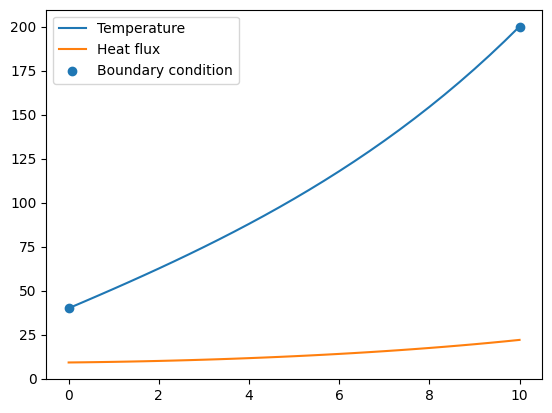

In [276]:
fig, ax = plt.subplots()
ax.plot(x, T, label='Temperature')
ax.plot(x, z, label='Heat flux')
ax.scatter([0,10],[40,200],label='Boundary condition')
ax.legend()